In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
# pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Column Transformer

Column Transformer is a sciket-learn class used to create and apply separate transformers for numerical and categorical data. To create transformers we need to specify the transformer object and pass the list of transformations inside a tuple along with the column on which you want to apply the transformation.

In [4]:
df = pd.read_csv(r'E:\Data Science\PYTHON_NOTES\CSV\autos_dataset.csv')

In [7]:
df['make'].nunique()

22

In [4]:
df['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [5]:
df['normalized-losses']=df['normalized-losses'].replace("?",np.nan)

In [6]:
df['num-of-doors']=df['num-of-doors'].replace("?",np.nan)

In [7]:
df['peak-rpm']=df['peak-rpm'].replace("?",np.nan)

In [8]:
df['horsepower']=df['horsepower'].replace("?",np.nan)

In [9]:
df['stroke']=df['stroke'].replace("?",np.nan)

In [10]:
df['bore']=df['bore'].replace("?",np.nan)
df['price']=df['price'].replace("?",np.nan)

In [11]:
df['horsepower']=df['horsepower'].astype(float)
df['peak-rpm']=df['peak-rpm'].astype(float)
df['price']=df['price'].astype(float)
df['normalized-losses']=df['normalized-losses'].astype(float)
df['stroke']=df['stroke'].astype(float)
df['bore']=df['bore'].astype(float)

In [12]:
df.head(1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0


In [13]:
df['normalized-losses']=df['normalized-losses'].fillna(df['normalized-losses'].mean())

df['num-of-doors']=df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])
df['bore']=df['bore'].fillna(df['bore'].mean())
df['stroke']=df['stroke'].fillna(df['stroke'].mean())
df['price']=df['price'].fillna(df['price'].mean())
df['horsepower']=df['horsepower'].fillna(df['horsepower'].mean())
df['peak-rpm']=df['peak-rpm'].fillna(df['peak-rpm'].mean())

In [14]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [15]:
df['num-of-doors'].value_counts()

four    116
two      89
Name: num-of-doors, dtype: int64

In [16]:
for i in df.columns:
    df.rename(columns={i:i.replace("-","_")},inplace=True)
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [17]:
df.corr()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.071389,0.273679,-0.035823,0.034606,-0.082201
normalized_losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
wheel_base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.682986
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.728699
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.134388
curb_weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825
engine_size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575737,-0.254761,-0.584508,-0.586992,0.532300
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088264,-0.066844,-0.042179,-0.043961,0.082095


# Multicolinearity

<AxesSubplot:>

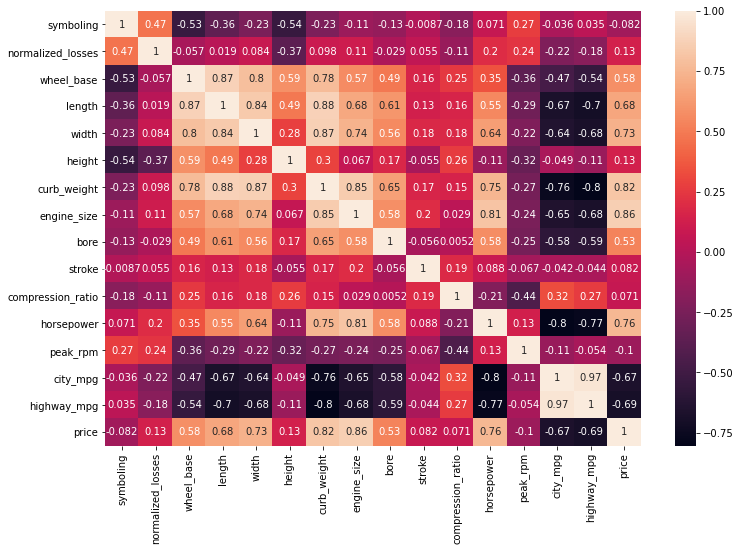

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot= True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [20]:
# this for numeric columns
numerical=df.select_dtypes(exclude=object)
numerical

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


# Detection of Outlier by Boxplot

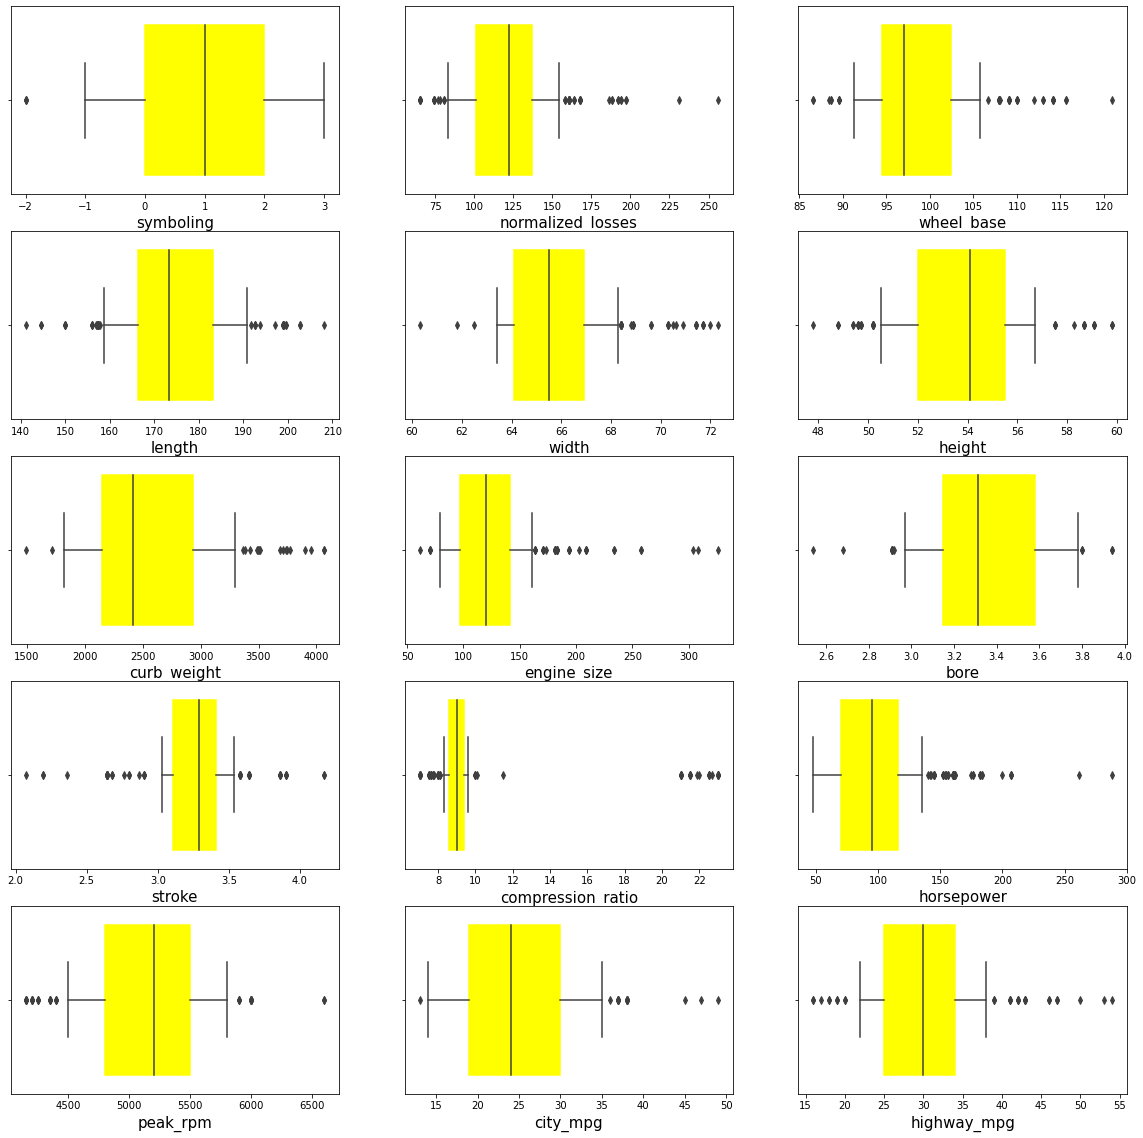

In [21]:
fig, ax = plt.subplots(5, 3, figsize=(20, 20))
for var,subplot in zip(numerical.columns,ax.flatten()):
    z=sns.boxplot(x=numerical[var],orient='h',whis=0.5,ax=subplot,boxprops=dict(color='yellow'))  # plot box plot
    z.set_xlabel(var,fontsize=15)
    
    
# boxprops=dict(facecolor=c, color=c),
#             capprops=dict(color=c),
#             whiskerprops=dict(color=c),
#             flierprops=dict(color=c, markeredgecolor=c),
#             medianprops=dict(color=c)

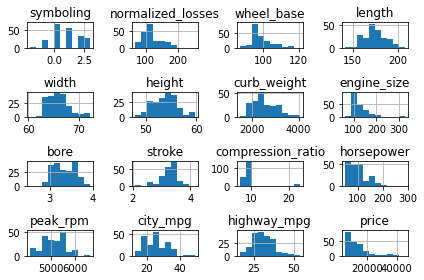

In [22]:
numerical.hist()
plt.tight_layout()
plt.show()

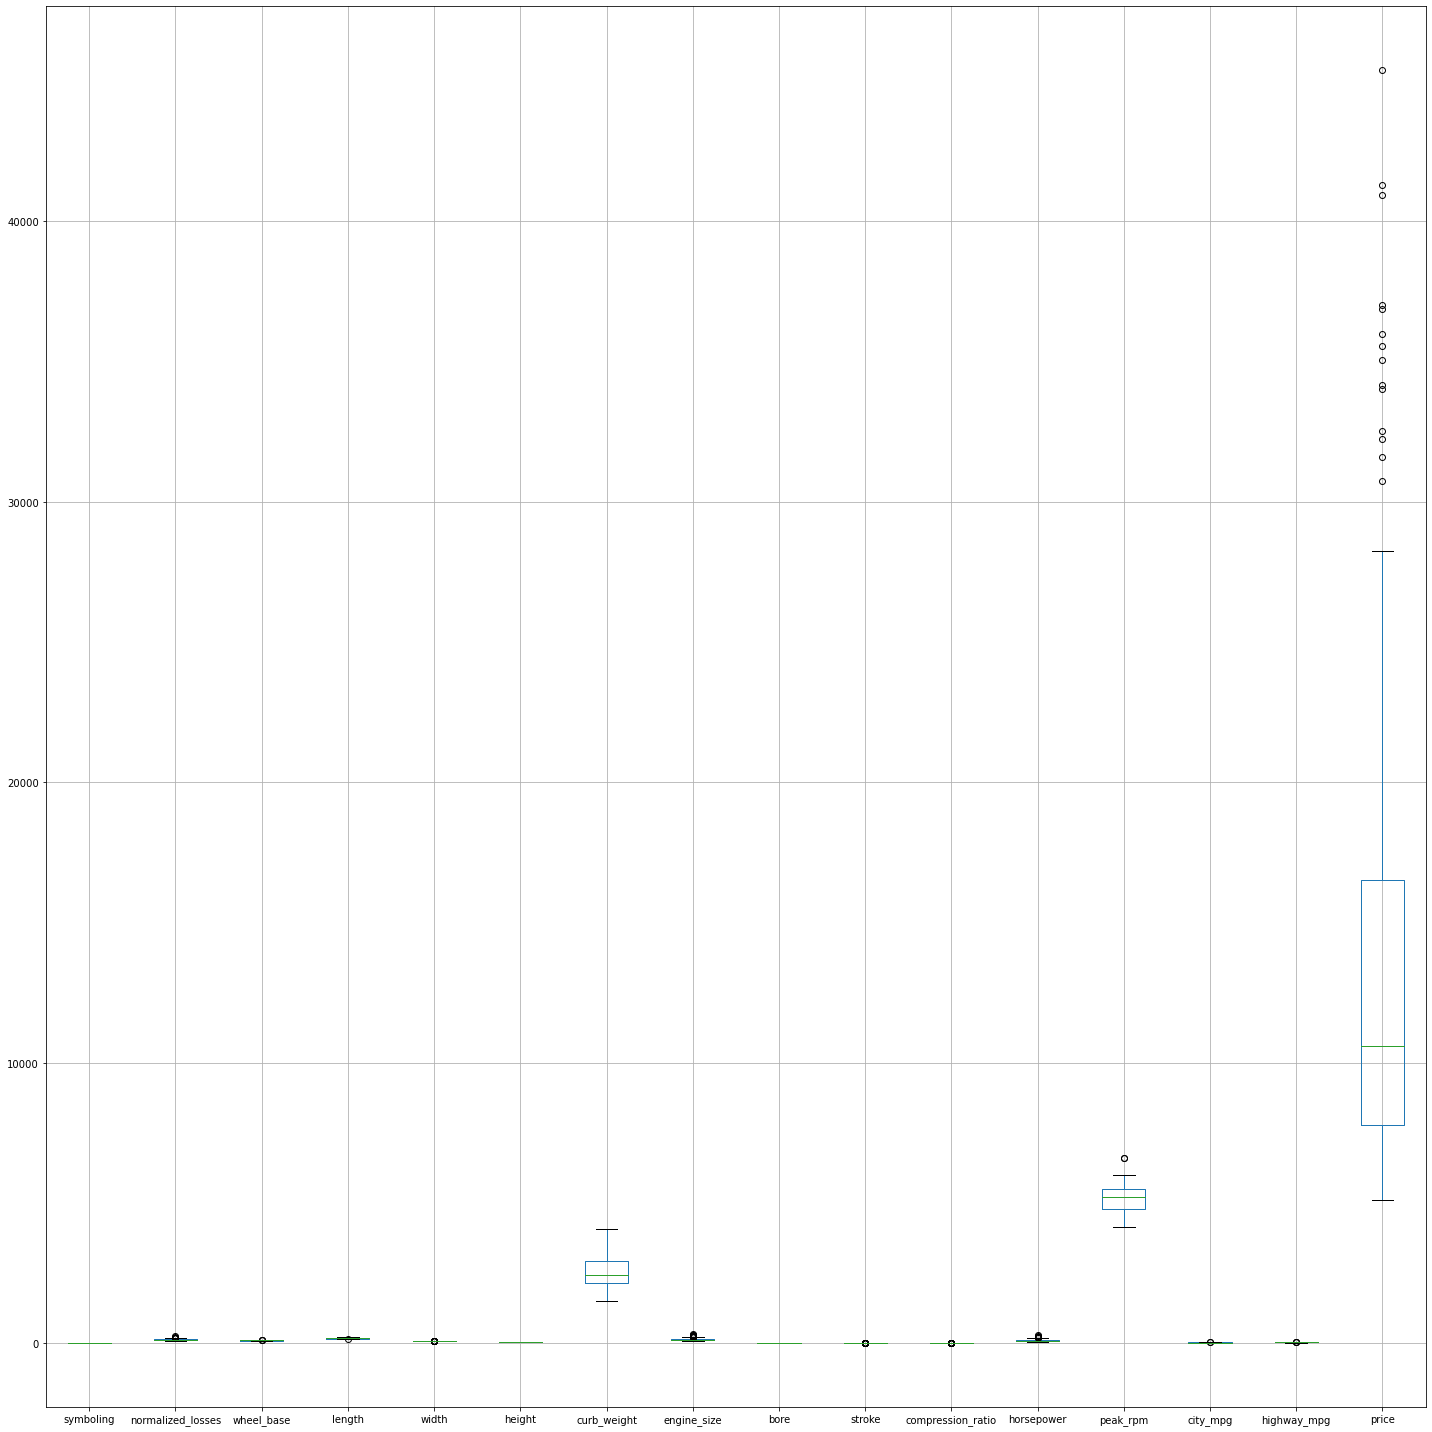

In [29]:
fig,ax=plt.subplots(figsize=(20,20))
numerical.boxplot(ax=ax,figsize=0.5,)
plt.tight_layout()
plt.show()

In [30]:
numerical

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


<ipython-input-31-445bbeec14fb>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  numerical.hist(ax=ax)


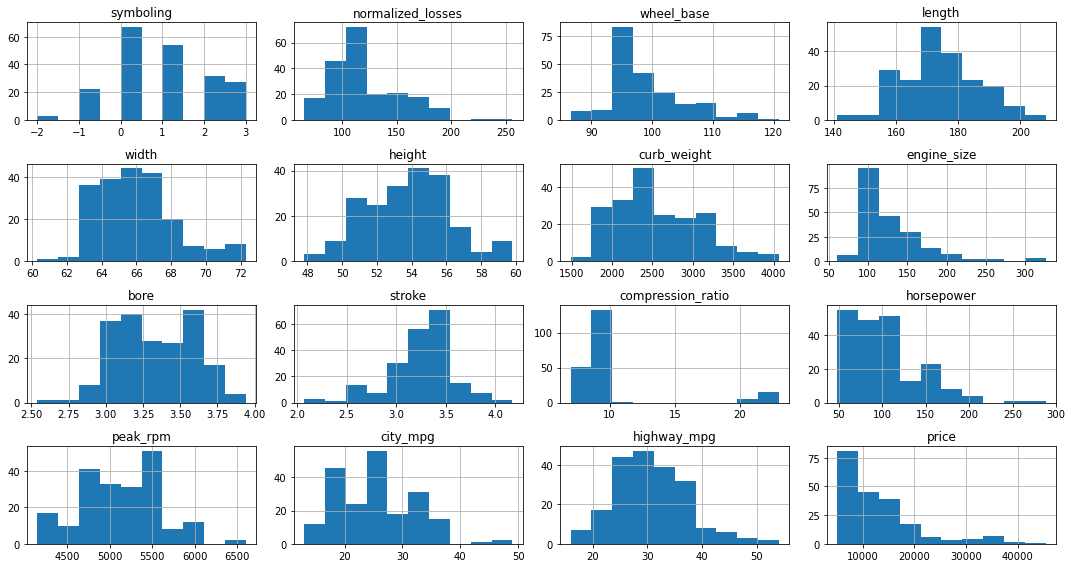

In [31]:
fig,ax=plt.subplots(figsize=(15,8))
numerical.hist(ax=ax)
plt.tight_layout()
plt.show()

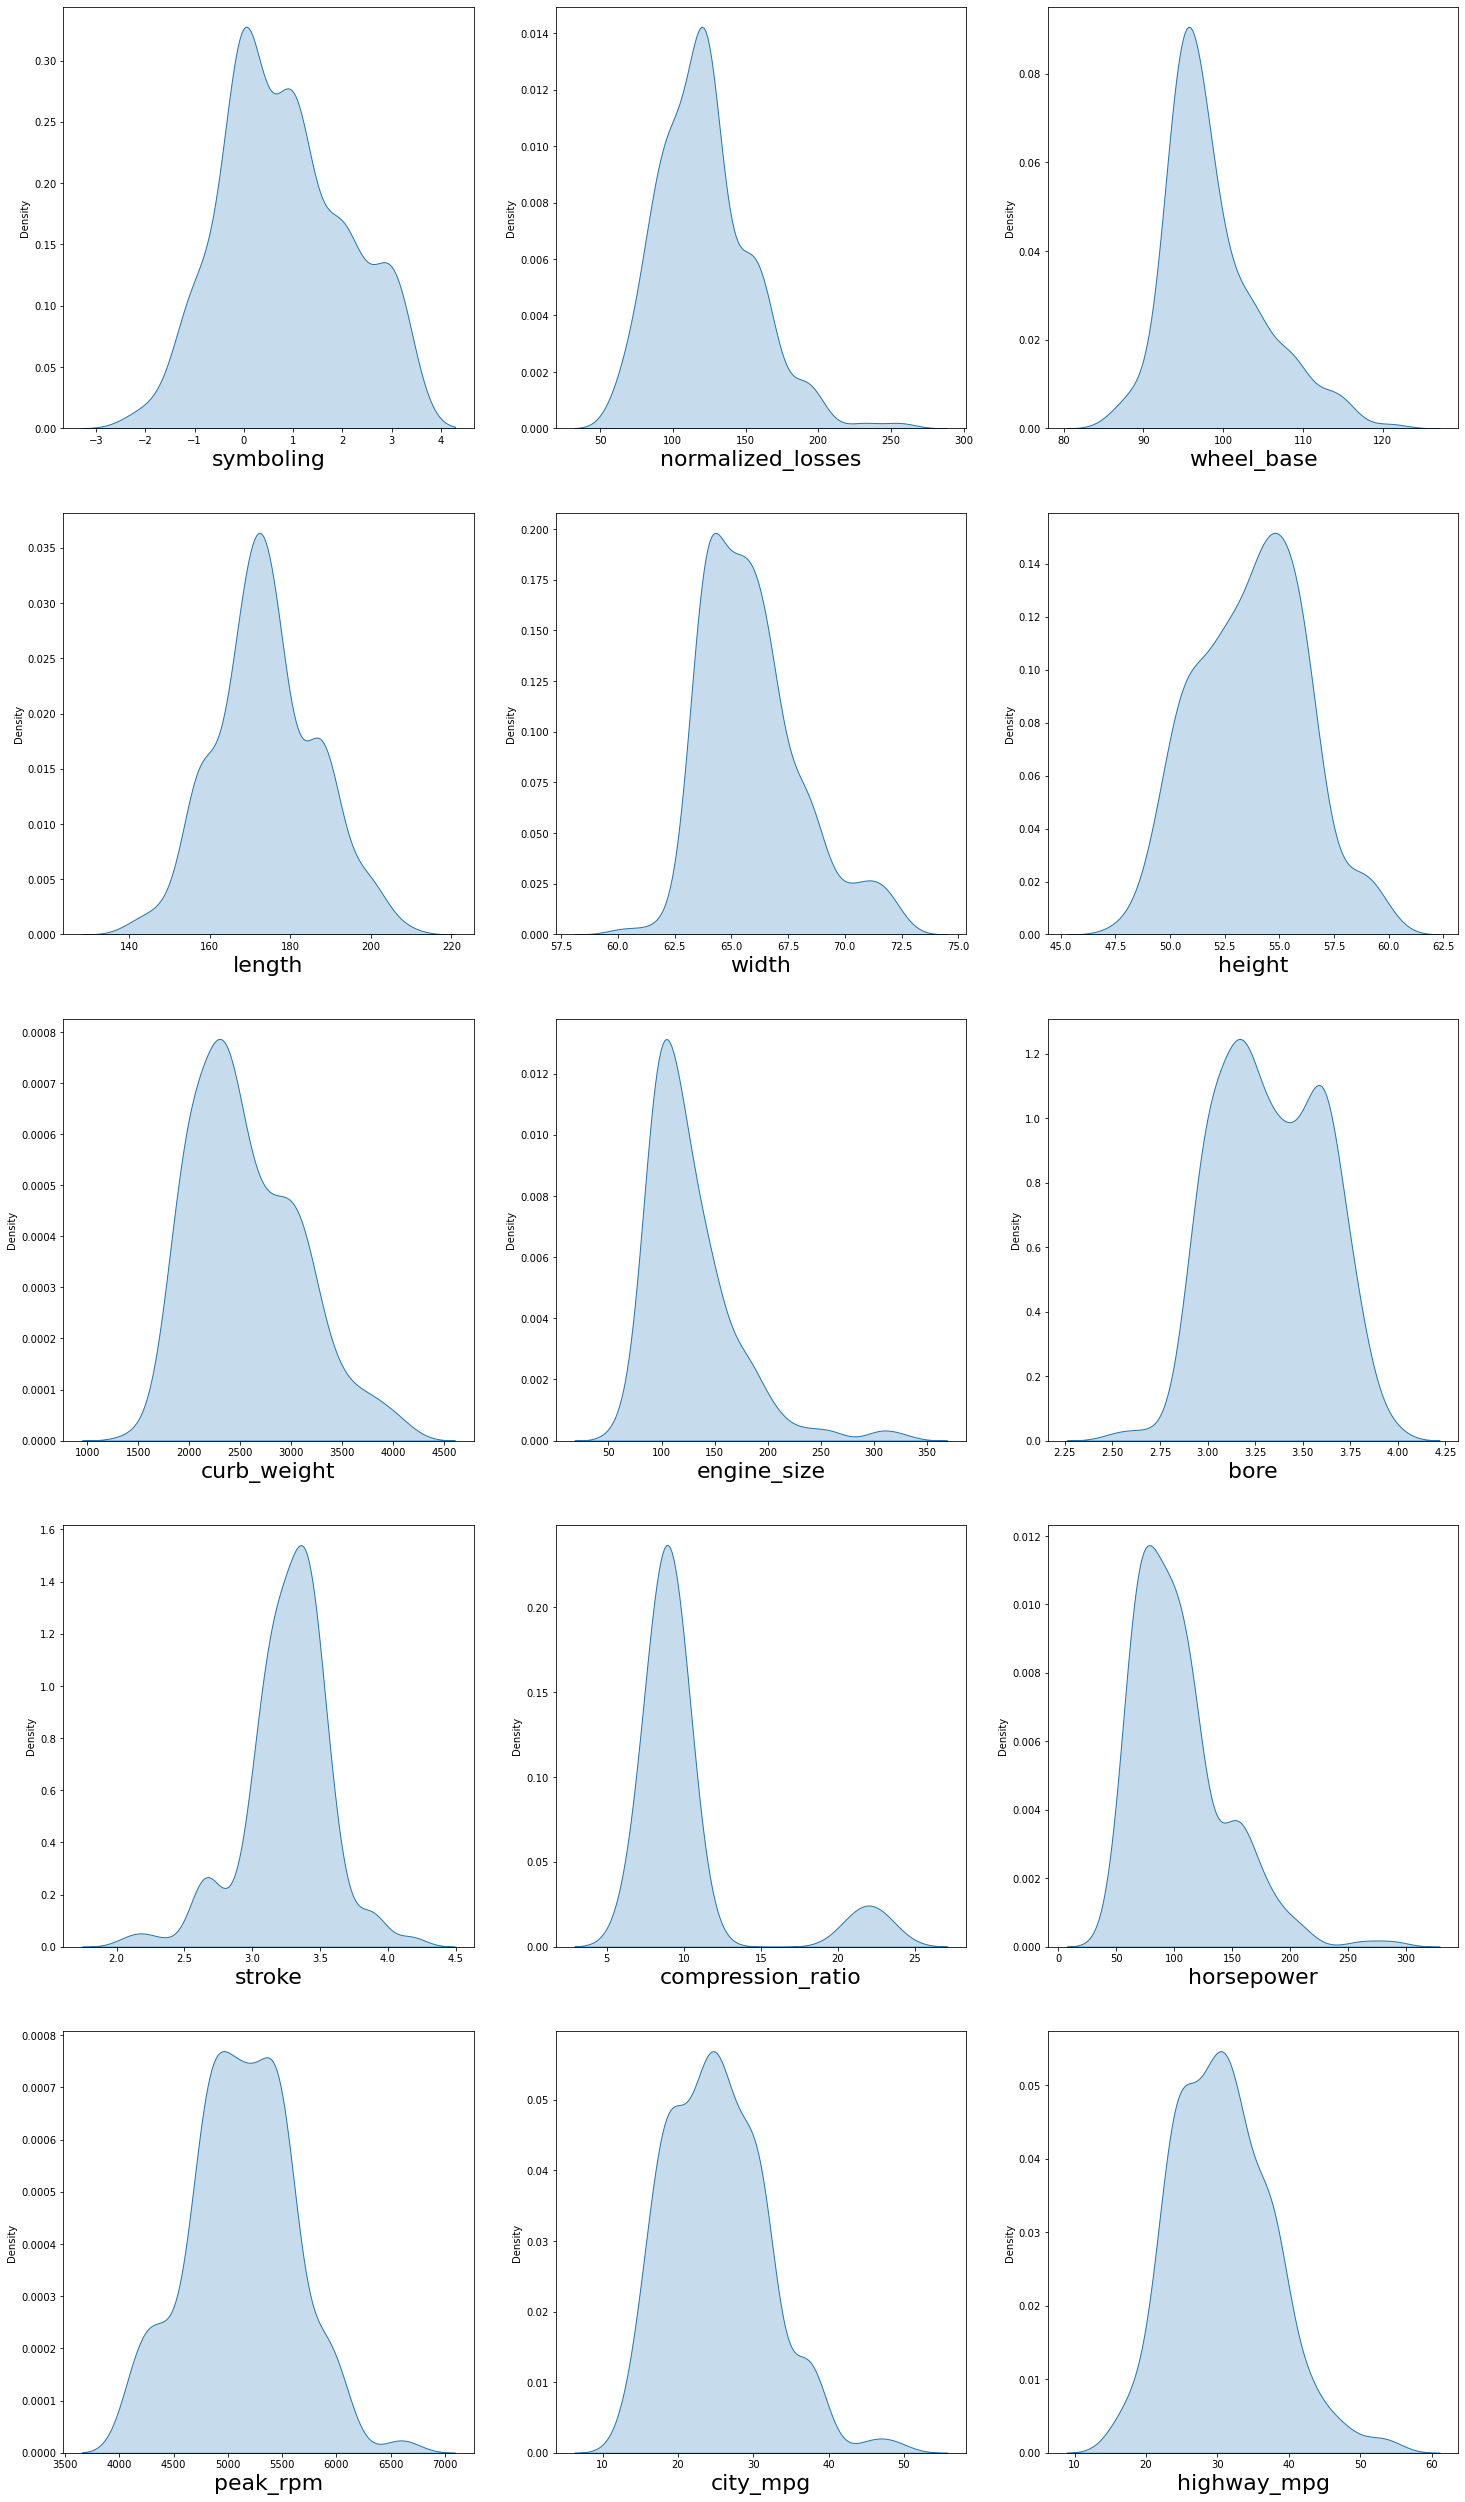

In [32]:
fig, ax = plt.subplots(5, 3, figsize=(25, 45))
for var,subplot in zip(numerical.columns,ax.flatten()):
    z=sns.kdeplot(x=numerical[var],ax=subplot,fill=True)  # plot box plot
    z.set_xlabel(var,fontsize=22)

In [33]:
# #plot subplot to descover the catagorical variables

# categorical = df.select_dtypes(include=object)

# fig, ax = plt.subplots(2, 5, figsize=(30, 20))
# for var,subplot in zip(categorical.columns,ax.flatten()):
#     sns.countplot(categorical[var],color='g',ax=subplot,palette="Set1",dodge=False)

# detection of outlier by IQR method

In [34]:
# we remove outlier  from below list
numerical.columns
# List =['engine_size',
# 'horsepower',
# 'normalized_losses',
# 'compression_ratio']

Index(['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [35]:
Q1=df['compression_ratio'].quantile(0.25)
Q2=df['compression_ratio'].quantile(0.50)
Q3=df['compression_ratio'].quantile(0.75)
IQR=Q3-Q1
upper_tail = Q3+1.5*IQR
lower_tail = Q1-1.5*IQR
df.loc[((df['compression_ratio'] > upper_tail) | (df['compression_ratio'] <lower_tail))].head(1)  # detection and updation

### df.loc[~((df['compression_ratio'] > upper_tail) | (df['compression_ratio'] <lower_tail))]   for dropping outlier

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160.0,5500.0,16,22,13207.129353


In [36]:
q1= df.stroke.quantile(0.25)
q3 =df.stroke.quantile(0.75)
iqr =q3-q1
uppertail = q3+1.5*iqr
lowertail = q1-1.5*iqr
df.loc[(df['stroke']>uppertail) |(df['stroke']<lowertail)]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
29,3,145.0,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156,mfi,3.60,3.90,7.0,145.000000,5000.000000,19,24,12964.0
47,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.000000,4750.000000,15,19,32250.0
48,0,122.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.000000,4750.000000,15,19,35550.0
111,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,2.19,8.4,95.000000,5000.000000,19,24,15580.0
113,0,122.0,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,2.19,8.4,95.000000,5000.000000,19,24,16695.0
130,0,122.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,104.256158,5125.369458,23,31,9295.0
131,2,122.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,104.256158,5125.369458,23,31,9895.0
134,3,150.0,saab,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,2.54,2.07,9.3,110.000000,5250.000000,21,28,15040.0
138,2,83.0,subaru,gas,std,two,hatchback,fwd,front,93.7,...,97,2bbl,3.62,2.36,9.0,69.000000,4900.000000,31,36,5118.0
139,2,83.0,subaru,gas,std,two,hatchback,fwd,front,93.7,...,108,2bbl,3.62,2.64,8.7,73.000000,4400.000000,26,31,7053.0


In [37]:
Q1=df['stroke'].quantile(0.25)
Q2=df['stroke'].quantile(0.50)
Q3=df['stroke'].quantile(0.75)
IQR=Q3-Q1
upper_tail = Q3+1.5*IQR
lower_tail = Q1-1.5*IQR
df.loc[((df['stroke'] > upper_tail) | (df['stroke'] <lower_tail))]   # detection

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
29,3,145.0,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156,mfi,3.60,3.90,7.0,145.000000,5000.000000,19,24,12964.0
47,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.000000,4750.000000,15,19,32250.0
48,0,122.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.000000,4750.000000,15,19,35550.0
111,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,2.19,8.4,95.000000,5000.000000,19,24,15580.0
113,0,122.0,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,2.19,8.4,95.000000,5000.000000,19,24,16695.0
130,0,122.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,104.256158,5125.369458,23,31,9295.0
131,2,122.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,104.256158,5125.369458,23,31,9895.0
134,3,150.0,saab,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,2.54,2.07,9.3,110.000000,5250.000000,21,28,15040.0
138,2,83.0,subaru,gas,std,two,hatchback,fwd,front,93.7,...,97,2bbl,3.62,2.36,9.0,69.000000,4900.000000,31,36,5118.0
139,2,83.0,subaru,gas,std,two,hatchback,fwd,front,93.7,...,108,2bbl,3.62,2.64,8.7,73.000000,4400.000000,26,31,7053.0


# Detection of  Outlier by <>shapiro<> method

In [38]:
from scipy.stats import shapiro
_,p_value=shapiro(df.stroke)
if p_value>=0.05:
    print("normal distibution")
else:
    print("non_normal distibution")

non_normal distibution


In [39]:
from scipy.stats import kstest,shapiro,normaltest
import statsmodels.st

ModuleNotFoundError: No module named 'statsmodels.st'

# Detection of Outlier by <>Z_SCORE<> method

z_score >>The Z-score, also known as the standard score, is a measure of how many standard deviations a value is from the mean of a dataset. 
The Z-score is commonly used in statistics and data analysis to standardize values and compare them to the mean. It is also used in hypothesis testing to determine whether a value is significantly different from the mean.

In [40]:
#mean ,std
mean_ =df.stroke.mean()
std_  =np.std(df.stroke)
# z_score (X_val-mean_)/std_

In [41]:
from scipy import stats
z_score =np.abs(stats.zscore(df.compression_ratio))
df.iloc[np.where(z_score>=2)].head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
63,0,122.0,mazda,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
66,0,122.0,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552.0
68,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248.0
69,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176.0


In [42]:
from scipy.stats import zscore
z=np.abs(zscore(df.compression_ratio))
# threshold = 2.5>>>>>>  it std deviation value which means value(x) is how much away from it std>>threshold
df.loc[np.where(z>2.5)] 

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
63,0,122.0,mazda,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
66,0,122.0,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552.0
68,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248.0
69,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176.0
70,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
90,1,128.0,nissan,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55.0,4800.0,45,50,7099.0
108,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,13200.0
110,0,122.0,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.52,21.0,95.0,4150.0,25,25,13860.0
112,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,16900.0


In [43]:
for x_val in df.stroke:
    z_score=(x_val-mean_)/std_
  # those are higher value calles as  outlier  << value are greater than ==1 or greater than that cal as value of outlier)

In [44]:
threshold=2
for x_val in df.stroke:
    z_score=(x_val-mean_)/std_
    z_score=np.abs(z_score)
    z_score=np.around(z_score,2)
    if z_score>=threshold:
        print(x_val)
# actual value of outlier

3.9
4.17
4.17
2.19
2.19
3.9
3.9
2.07
2.36


In [45]:
xmean=df.stroke.mean()
List = []
std = np.std(df.stroke)
for x in df.stroke:
    z_score = (x- xmean)/std
    z_score =np.abs(z_score)
    z_score = np.around(z_score,2)
    if z_score>2:
        List.append(x)
df.loc[np.where(df.stroke.isin(List))]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
29,3,145.0,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156,mfi,3.60,3.90,7.0,145.000000,5000.000000,19,24,12964.0
47,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.000000,4750.000000,15,19,32250.0
48,0,122.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.000000,4750.000000,15,19,35550.0
111,0,161.0,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,2.19,8.4,95.000000,5000.000000,19,24,15580.0
113,0,122.0,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,2.19,8.4,95.000000,5000.000000,19,24,16695.0
130,0,122.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,104.256158,5125.369458,23,31,9295.0
131,2,122.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,104.256158,5125.369458,23,31,9895.0
134,3,150.0,saab,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,2.54,2.07,9.3,110.000000,5250.000000,21,28,15040.0
138,2,83.0,subaru,gas,std,two,hatchback,fwd,front,93.7,...,97,2bbl,3.62,2.36,9.0,69.000000,4900.000000,31,36,5118.0


In [46]:
List

[3.9, 4.17, 4.17, 2.19, 2.19, 3.9, 3.9, 2.07, 2.36]

In [47]:
# z_score =(x_val-x_mean)/std
x_mean= df.stroke.mean()
std = np.std(df.std)
List =[]
for x_val in df.stroke:
    z_score =(x_val-x_mean)/std
    z_score =np.abs(z_score)
    z_score =np.around(z_score,2)
    threshold=2
    if z_score>=threshold:
        print(x_val)

AttributeError: 'function' object has no attribute 'dtype'

In [48]:

mean_ =df.compression_ratio.mean()
std_  =np.std(df.compression_ratio)
threshold=2
for x_val in df.compression_ratio:
    z_score=(x_val-mean_)/std_
    z_score=np.abs(z_score)
    z_score=np.around(z_score,2)
    if z_score>=threshold:
        print(x_val)
# actual value of outlier

22.7
22.0
21.5
21.5
21.5
21.5
21.9
21.0
21.0
21.0
21.0
21.0
22.5
22.5
22.5
23.0
23.0
23.0
23.0
23.0


In [49]:
from scipy import stats
z_score =np.abs(stats.zscore(df.compression_ratio))
df.iloc[np.where(z_score>=2)].head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
63,0,122.0,mazda,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
66,0,122.0,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552.0
68,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248.0
69,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176.0


In [50]:
from scipy import stats
z_score = np.abs(stats.z_score(df.stroke))
df.iloc[np.where(z_score>=2)]

AttributeError: module 'scipy.stats' has no attribute 'z_score'

# by calculation

In [51]:
cal_mean =df.compression_ratio.mean()
std_ = np.std(df.compression_ratio)
# z=(x-x+mean)\std
List= []
for x in df.compression_ratio:
    cal =(x-cal_mean)/std_
    List.append(np.abs(cal))
df.iloc[np.where(np.array(List)>=2)].head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
63,0,122.0,mazda,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
66,0,122.0,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552.0
68,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248.0
69,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176.0


In [52]:
from scipy import stats
z_score =np.abs(stats.zscore(df.compression_ratio))
threshold=2
df.iloc[np.where(z_score>=threshold)]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
63,0,122.0,mazda,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
66,0,122.0,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552.0
68,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248.0
69,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176.0
70,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
90,1,128.0,nissan,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55.0,4800.0,45,50,7099.0
108,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,13200.0
110,0,122.0,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.52,21.0,95.0,4150.0,25,25,13860.0
112,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,16900.0


In [53]:
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [54]:
#df['num_of_doors']=df['num_of_doors'].replace({'two':2,'four':4}).astype(float)

# Ordinal Encoding

In [55]:
order_enc =OrdinalEncoder(categories=[['two','four']])
df['num_of_doors']=order_enc.fit(df[['num_of_doors']]).transform(df[['num_of_doors']])

In [ ]:
order = OrdinalEncoder(categri=[['two','four']])
df['num'] = order.fit_transfor(df[['doores']])

In [ ]:
df.info()

In [ ]:
# label Encoding >>> only applicable for target column
label=LabelEncoder()
label.fit_transform(df_[col_name])

In [56]:
# ordinal encoding

ordinal = OrdinalEncoder(categories=[['two','four']])
df['num_of_doors']=ordinal.fit_transform(df[['num_of_doors']])

ValueError: could not convert string to float: 'two'

In [57]:
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,0.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,0.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,0.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,1.0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,1.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,1.0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,1.0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,1.0,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,1.0,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [37]:
df['make'].nunique()# one way to one hot encoding to reduce curse of dimenstionality
# here we are taking all the those categorie whose has count greater than 9 and remainng categoriea will be the in one common category (other)

22

In [38]:
ohc= OneHotEncoder(sparse=False,dtype=np.int32)
count_9 =df['make'].value_counts()
replace_ =count_9[count_9<=9].index
print(replace_)
df[['make']].replace(replace_,"other")

Index(['dodge', 'mercedes-benz', 'bmw', 'audi', 'plymouth', 'saab', 'porsche',
       'isuzu', 'jaguar', 'chevrolet', 'alfa-romero', 'renault', 'mercury'],
      dtype='object', name='make')


,make
0,other
1,other
2,other
3,other
4,other
...,...
200,volvo
201,volvo
202,volvo
203,volvo


A sparse matrix is a matrix in which most of the elements are zero

# One Hot Encoding

Applicable to nominal Data
>
Do not have sequence data

In [58]:
One_hot =OneHotEncoder()
arr = One_hot.fit_transform(df[['make']]).toarray()
df_arr =pd.DataFrame(arr,columns=df['make'].unique())


In [59]:
onehot = OneHotEncoder()
df[list(df.make.unique())]=onehot.fit_transform(df[['make']]).A

In [60]:
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,122.0,alfa-romero,gas,std,0.0,convertible,rwd,front,88.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,122.0,alfa-romero,gas,std,0.0,convertible,rwd,front,88.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,122.0,alfa-romero,gas,std,0.0,hatchback,rwd,front,94.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,164.0,audi,gas,std,1.0,sedan,fwd,front,99.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,164.0,audi,gas,std,1.0,sedan,4wd,front,99.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,1.0,sedan,rwd,front,109.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
201,-1,95.0,volvo,gas,turbo,1.0,sedan,rwd,front,109.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
202,-1,95.0,volvo,gas,std,1.0,sedan,rwd,front,109.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
203,-1,95.0,volvo,diesel,turbo,1.0,sedan,rwd,front,109.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
one = onehotencoding()
df[list(df[col].uniue)]= onehot.fittransofrm(df[[col]]).toarray()


NameError: name 'onehotencoding' is not defined

In [62]:
ob =OneHotEncoder()
ob.fit_transpfor(df[['amke']]).toarray()

AttributeError: 'OneHotEncoder' object has no attribute 'fit_transpfor'

In [63]:
df_arr

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [64]:
#pd.concat([df,df_arr],axis=1)

In [65]:
# df.join(df_arr)

In [66]:
df[list(df['make'].unique())] = One_hot.fit_transform(df[['make']]).toarray()

In [67]:
df = df.drop('make',axis=1)

# pd.`get_dummies()

In [68]:
pd.get_dummies(df,columns=['fuel_type'],drop_first=False)   # your encoded columns will drop 

,symboling,normalized_losses,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,fuel_type_diesel,fuel_type_gas
0,3,122.0,std,0.0,convertible,rwd,front,88.6,168.8,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,3,122.0,std,0.0,convertible,rwd,front,88.6,168.8,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,1,122.0,std,0.0,hatchback,rwd,front,94.5,171.2,65.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,2,164.0,std,1.0,sedan,fwd,front,99.8,176.6,66.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,2,164.0,std,1.0,sedan,4wd,front,99.4,176.6,66.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,std,1.0,sedan,rwd,front,109.1,188.8,68.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
201,-1,95.0,turbo,1.0,sedan,rwd,front,109.1,188.8,68.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
202,-1,95.0,std,1.0,sedan,rwd,front,109.1,188.8,68.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
203,-1,95.0,turbo,1.0,sedan,rwd,front,109.1,188.8,68.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0


In [69]:
pd.get_dummies(df,columns=['fuel_type'],drop_first=False)

,symboling,normalized_losses,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,fuel_type_diesel,fuel_type_gas
0,3,122.0,std,0.0,convertible,rwd,front,88.6,168.8,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,3,122.0,std,0.0,convertible,rwd,front,88.6,168.8,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,1,122.0,std,0.0,hatchback,rwd,front,94.5,171.2,65.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,2,164.0,std,1.0,sedan,fwd,front,99.8,176.6,66.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,2,164.0,std,1.0,sedan,4wd,front,99.4,176.6,66.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,std,1.0,sedan,rwd,front,109.1,188.8,68.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
201,-1,95.0,turbo,1.0,sedan,rwd,front,109.1,188.8,68.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
202,-1,95.0,std,1.0,sedan,rwd,front,109.1,188.8,68.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
203,-1,95.0,turbo,1.0,sedan,rwd,front,109.1,188.8,68.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0


In [70]:
df = pd.get_dummies(df,columns=['fuel_type','aspiration','body_style','drive_wheels','engine_location','engine_type','fuel_system'],drop_first=False)

In [71]:
df['num_of_cylinders']=df['num_of_cylinders'].replace({'four':4,'six':6,'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

In [72]:
x=df.drop('price',axis=1)

In [73]:
y=df['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized_losses       205 non-null    float64
 2   num_of_doors            205 non-null    float64
 3   wheel_base              205 non-null    float64
 4   length                  205 non-null    float64
 5   width                   205 non-null    float64
 6   height                  205 non-null    float64
 7   curb_weight             205 non-null    int64  
 8   num_of_cylinders        205 non-null    int64  
 9   engine_size             205 non-null    int64  
 10  bore                    205 non-null    float64
 11  stroke                  205 non-null    float64
 12  compression_ratio       205 non-null    float64
 13  horsepower              205 non-null    float64
 14  peak_rpm                205 non-null    fl

In [75]:
df

,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,...,engine_type_ohcv,engine_type_rotor,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,3,122.0,0.0,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,0.0,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,0.0,94.5,171.2,65.5,52.4,2823,6,152,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,1.0,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,1.0,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,1.0,109.1,188.8,68.9,55.5,2952,4,141,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,1.0,109.1,188.8,68.8,55.5,3049,4,141,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,1.0,109.1,188.8,68.9,55.5,3012,6,173,...,1,0,0,0,0,0,0,1,0,0
203,-1,95.0,1.0,109.1,188.8,68.9,55.5,3217,6,145,...,0,0,0,0,0,1,0,0,0,0


# Train test split

In [76]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=40)

In [77]:
x_train.shape,y_train.shape,

((164, 68), (164,))

In [78]:
x_test.shape,y_test.shape,

((41, 68), (41,))

# # Model Training

In [79]:
from sklearn.linear_model import LinearRegression
linear_model =LinearRegression()

In [80]:
linear_model.fit(x_train,y_train)

LinearRegression()

# model Evalution

In [81]:
y_pred = linear_model.predict(x_test)
y_pred

array([16406.52993934, 14852.72387855,  5857.62825544,  8436.83530035,
       10385.53359446,  7187.21790265,  7265.81454481,  6129.7141905 ,
       29282.13837068,  6204.64878259, 10089.50893626, 10707.01281748,
        6778.61654146,  6968.07323256, 15397.61600596,  8034.96559992,
        6505.76123029,  8193.45214279,  5518.99218122,  8657.04107502,
        7376.87805024,  6906.60816456, 10484.04379407,  6794.9947578 ,
       12400.42517023, 13384.52413739, -1821.46775945, 13573.61185263,
       13654.57076766,  7114.04527455,  8324.97023798, 12761.70942023,
       15767.07730858,  7985.00002034, 20206.42384355, 13130.13197804,
        5039.56521481, 10584.87008088, 10524.24117124,  6220.07938331,
        5677.06791734])

# residual 

In [83]:
residual = y_test - y_pred
res = y_test-y_pred

# Assumption of Normality 
#Note normality check on test data

Normality of residual

1.kdeplot
2.Hypoithesis testing
2.1 shapiro test
2.2 kstest test
2.3 normality test

3. qq_plot





Kolmogorov-Smirnov Test (KSTest): A statistical test that compares the distribution of a sample to a theoretical or reference distribution by calculating the maximum difference between their cumulative distribution functions.

Normal Test: A statistical test used to determine if a sample of data follows a normal distribution.

Shapiro Test: A statistical test used to assess if a sample of data follows a normal distribution by comparing the sample's mean and variance to the expected mean and variance of a normal distribution.

# 1.kdeplot# 

In [116]:
sns.kdeplot([residual],fill =True)

NameError: name 'residual' is not defined

<AxesSubplot:ylabel='Density'>

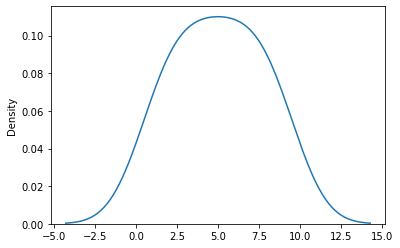

In [3]:
import seaborn as sns
sns.kdeplot([1,2,3,4,5,6,7,8,9],fill =False)

In [118]:
from scipy.stats import shapiro,kstest,normaltest
_,p_value =shapiro([1,2,3,4,5,6,7,8,9])
if p_value>=0.05:
    print("normal")
else:
    "non normal"

normal


# Hypothesis Testing to check Normality

In [119]:
1.shapiro test
2.kstest
3.normality test


0.05  is significance value in hypotheis testing
p_value  >= 0.05 >>>  we are accepting Null hypotheis  
P_value  <= 0.05 >>>  we are accepting alternate hypothesis

SyntaxError: invalid syntax (<ipython-input-119-e7a72ead1912>, line 1)

In [120]:
from scipy.stats import shapiro
_,p_value=shapiro(df.stroke)
if p_value>=0.05:
    print("normal distibution")
else:
    print("non_normal distibution")

non_normal distibution


# 1.1shapiro test

In [121]:
from scipy.stats import shapiro
_,p_value =shapiro(residual)
if p_value>=0.05:
    print("Normally Distributed")
else:
    print("Non-Normally Distributed")


NameError: name 'residual' is not defined

In [ ]:
_,p_val = kstest(df.s)

In [ ]:
from scipy.stats import kstest,normaltest,shapiro
import statsmodels.api as sm
import scipy.stats as sts

# 2.2kstest

In [122]:
from scipy.stats import kstest
_,p_value = kstest(residual,'norm')
if p_value>=0.05:
    print("Normally Distributed")
else:
    print("Non-Normally Distributed")


NameError: name 'residual' is not defined

# 2.3.Normal test

In [123]:
from scipy.stats import normaltest
_,p_value = normaltest(residual)
if p_value>=0.05:
    print("Normally Distributed")
else:
    print("Non-Normally Distributed") 


NameError: name 'residual' is not defined

In [124]:
import scipy.stats as sts
import statsmodels.api as sm
import scipy.stats as sts
import statsmodels.api as sm
sm.qqplot(residual,line='45',dist=sts.norm)

In [ ]:
from scipy.stats import kstest,normaltest,shapiro
import statsmodels.api as sm
import scipy.stats as sts

# QQ-PLOT

In [125]:
import statsmodels.api as sm
import scipy.stats as sts
sm.qqplot(residual,line ='45',dist=sts.norm,fit=True)

NameError: name 'residual' is not defined

# Assumption of Homoscedascity
The assumption of equal variance
 >> Residual term should be in specific range for all independent variable
1
The assumption of equal variance

In [126]:
sns.scatterplot(y_pred,residual)

NameError: name 'y_pred' is not defined

In [127]:
sns.scatterplot(y,residual)

NameError: name 'residual' is not defined

# Evaluation

# Train Data

In [128]:
y_pred_train =linear_model.predict(x_train)

ValueError: could not convert string to float: 'volvo'

In [129]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [130]:
MAE = mean_absolute_error(y_train,y_pred_train)
print(MAE)
MSE = mean_squared_error(y_train,y_pred_train)
print(MSE)
RMSE =np.sqrt(MSE)
print(RMSE)
# 1189.234398761025
# 2802893.5395655003
# 1674.1844401276403

NameError: name 'y_pred_train' is not defined

In [131]:
#### Coefficient of Determinat
R2_score =r2_score(y_train,y_pred_train)
print(R2_score)  
# R2 = +1  >>  SSE =   0 > Best score >> All the data points are on regression line
# R2 =  0  >>  SSE = SST > Bad  score >> Data points are far away from regression line

# R2 = -ve >>  SSE > SST

NameError: name 'y_pred_train' is not defined

In [ ]:
ad_r2 =1-(((1-R2_score)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1))
print(ad_r2)

# Test Data

In [ ]:
y_pred_test = linear_model.predict(x_test)
MAE =mean_absolute_error(y_test,y_pred_test)
print(MAE)
MSE =mean_squared_error(y_test,y_pred_test)
print(MSE)
r2score=r2_score(y_test,y_pred_test)
print(r2score)
ad_r2 =1-(((1-R2_score)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print(ad_r2)


In [ ]:
class Linear_Regressor():
    # intitating parameter 
    
    def __init__(self,learning_rate,no_of_iterations):
        self.learning_rate   = learning_rate
        self.no_of_iterations = no_of_iterations
    
    def fit(self,x,y):
        
        self.m,self.n= x.shape   # m as number of training data point i.e row
                                 # n as number feature i.e columns,#  hyper parameter>> learning_rate,no_of_parameter
        
        
        
        self.w = np.zeros(self.n)
        self.b = 0
        self.x=x
        self.y=y
        
        
        #implementation of gradient descent algorithms
        for i in range(self.no_of_iterations):
            self.update_weights()
    
    def update_weights(self):
        y_prediction = self.predict(self.x)
        # cal gradient 
        dw =-(2*(self.x.T).dot(self.y-y_prediction))/self.m
        db =-2*np.sum(self.y-y_prediction)/self.m
         
        # updating weights and bias
        self.w =self.w-self.learning_rate*dw
        self.b =self.b-self.learning_rate*db
        
        
        
        
    
    def predict(self,x):
        
        return x.dot(self.w)+self.b     ## formula  y=wx+b
    

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = Linear_Regressor(learning_rate=0.02,no_of_iterations=1)

In [ ]:
import numpy as np 
lr_model.fit(x_train,y_train)

In [ ]:
print(lr_model.w)
print(lr_model.b)

# How to Handle Outliers

In [ ]:
1. Delete data 
2. Imputation 
3. Transformation

In [ ]:
df

# first step to detect outlier and then handle

In [ ]:
q1 =df['normalized_losses'].quantile(0.25)
q2 =df['normalized_losses'].quantile(0.50)
q3 =df['normalized_losses'].quantile(0.75)
IQR = q3-q1
uppertail =q3+1*IQR
lowertail =q1-1*IQR
df.loc[(df['normalized_losses']>uppertail) | (df['normalized_losses']<lowertail)]

In [ ]:
df[['normalized_losses']].boxplot()

In [ ]:
sns.boxplot(df['normalized_losses'])

In [ ]:
df.loc[~(df['normalized_losses']>uppertail) | (df['normalized_losses']<lowertail)]  # without outliers

# handle outlier by imputation <<< with perticular col or by statics value>> 

# methode -1

In [ ]:
Mean_val=df['normalized_losses'].loc[~(df['normalized_losses']>uppertail) | (df['normalized_losses']<lowertail)].mean()

In [ ]:
Mean_val

In [ ]:
# mean value before imputation of outlier
df.loc[~(df['normalized_losses']>uppertail) | (df['normalized_losses']<lowertail)].describe()

In [ ]:
# mean value before imputation of outlier>>>118.563452

### imputation done

In [ ]:
df.loc[(df['normalized_losses']>uppertail) | (df['normalized_losses']<lowertail)]= Mean_val

In [ ]:
# mean value after imputation of outlier
df.describe()

In [ ]:
sns.boxplot(df['normalized_losses'])

# Method-2

In [ ]:
sns.boxplot(df['compression_ratio'])

In [ ]:
q1=df['compression_ratio'].quantile(0.25)
q2=df['compression_ratio'].quantile(0.50)
q3=df['compression_ratio'].quantile(0.75)
IQR =q3-q1
uppertail=q3+1.5*IQR
# detection of outlier
df.loc[(df['compression_ratio']>uppertail)]  # with outlier

In [ ]:
cal_mean= df['compression_ratio'].loc[~(df['compression_ratio']>uppertail)].mean()

In [ ]:
cal_mean

In [ ]:
df['compression_ratio'].loc[~(df['compression_ratio']>uppertail)].describe()

In [ ]:
df['compression_ratio']=np.where((df['compression_ratio']>uppertail),cal_mean,df['compression_ratio'])

In [ ]:
sns.boxplot(df['compression_ratio'])

# 3. Transformation

In [ ]:
# USE CASE
1. Reduce impact of outliers
2. To calculate distance between two data points
3. Obeservation will not be deleted
4. KNN algorithm

1) Log Transformation
2) Scaling:
    a) Normalization
    b) standardization

In [85]:
df_set =pd.read_excel("D:/PYTHON_NOTES/EXCEL/Emp_Records.xlsx")
df_set

,Emp ID,First Name,Age in Yrs,Weight in Kgs,Age in Company,Salary,City
0,677509,Lois,36.36,60,13.68,168251,Denver
1,940761,Brenda,47.02,60,9.01,51063,Stonewall
2,428945,Joe,54.15,68,0.98,50155,Michigantown
3,408351,Diane,39.67,51,18.30,180294,Hydetown
4,193819,Benjamin,40.31,58,4.01,117642,Fremont
...,...,...,...,...,...,...,...
95,639892,Jose,22.82,89,1.05,129774,Biloxi
96,704709,Harold,32.61,77,5.93,156194,Carol Stream
97,461593,Nicole,52.66,60,28.53,95673,Detroit
98,392491,Theresa,29.60,57,6.99,51015,Mc Grath


In [86]:
df_set.columns=['Emp_ID','First_Name','Age_in_Yrs','Weight_in_Kgs','Age_in_Company','Salary','City']
df_set

,Emp_ID,First_Name,Age_in_Yrs,Weight_in_Kgs,Age_in_Company,Salary,City
0,677509,Lois,36.36,60,13.68,168251,Denver
1,940761,Brenda,47.02,60,9.01,51063,Stonewall
2,428945,Joe,54.15,68,0.98,50155,Michigantown
3,408351,Diane,39.67,51,18.30,180294,Hydetown
4,193819,Benjamin,40.31,58,4.01,117642,Fremont
...,...,...,...,...,...,...,...
95,639892,Jose,22.82,89,1.05,129774,Biloxi
96,704709,Harold,32.61,77,5.93,156194,Carol Stream
97,461593,Nicole,52.66,60,28.53,95673,Detroit
98,392491,Theresa,29.60,57,6.99,51015,Mc Grath


C:\Users\Ankit\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight_in_Kgs'>

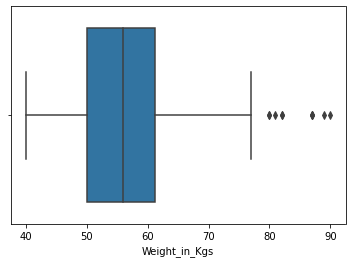

In [87]:
sns.boxplot(df_set['Weight_in_Kgs'])

This are the nonlinear Transformation
Log Transformation
cuberoot Transformation
Sqrt Transformation
recprocal

# 3.1 Log Transformation

C:\Users\Ankit\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight_in_Kgs'>

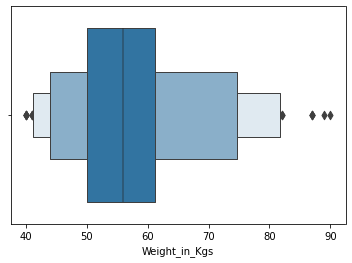

In [88]:
sns.boxenplot(df_set['Weight_in_Kgs'])

C:\Users\Ankit\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight_in_Kgs'>

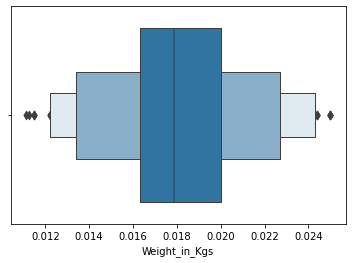

In [90]:
sns.boxenplot(1/df_set['Weight_in_Kgs'])

In [ ]:
sns.boxplot(np.log(df_set['Weight_in_Kgs']))

<AxesSubplot:xlabel='Weight_in_Kgs', ylabel='Density'>

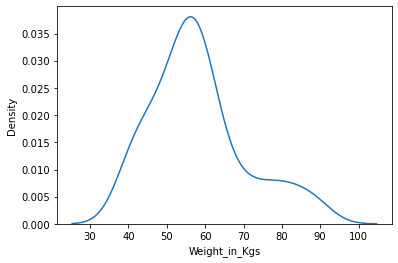

In [91]:
sns.kdeplot(df_set['Weight_in_Kgs'])

<AxesSubplot:xlabel='Weight_in_Kgs', ylabel='Density'>

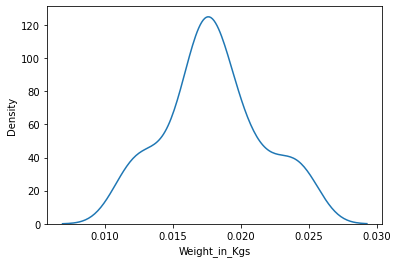

In [92]:
sns.kdeplot(1/df_set['Weight_in_Kgs'])

In [ ]:
sns.kdeplot(df_set['Weight_in_Kgs'])

In [ ]:
sns.kdeplot(np.log(df_set['Weight_in_Kgs']))

# 2. cuberoot Transformation

In [ ]:
sns.kdeplot(np.sqrt(df_set['Weight_in_Kgs']))

In [ ]:
sns.kdeplot(df_se)

# 3.3 Sqrt Trnasformation

In [ ]:
sns.boxplot(np.cbrt(df_set["Weight_in_Kgs"]))

# 3.4 recprocal

In [ ]:
sns.boxplot(1/df_set['Weight_in_Kgs'])

# 1. Normalization

In [ ]:
df_set.describe()

In [ ]:
df_set.head()

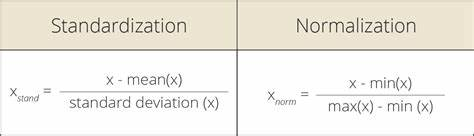

Normalization refers to re-scaling the values to fit into a range of [0,1]. 
Standardization refers to re-scaling data to have a mean of 0 and a standard deviation of 1 (Unit variance). 
Normalization is useful when all parameters need to have the
identical positive scale however the outliers from the data set are lost.

Which Algorithms may benefit after Scaling? Scaling is helpful in Distance-based algorithms and also in faster convergenc

# using min and max scalar

In [ ]:
Min_= df_set['Salary'].min()
Max_= df_set['Salary'].max()
Min_,Max_

In [ ]:
df_set

In [ ]:
X_normal =(50155-Min_)/(Max_-Min_)
X_normal ## use this value to normalized outlier

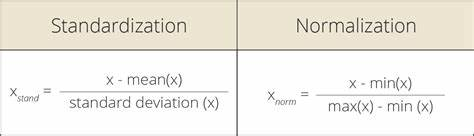

![image.png](attachment:image.png)

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
X_normal =MinMaxScaler()
Scal_=X_normal.fit_transform(df_set[['Salary']])

In [ ]:
df_set['Salary']=pd.DataFrame(Scal_)

In [ ]:
df_set

# 5.Standardization

In [ ]:
# it is same as z_score
std_scalar = (X- Xmean)/std

In [ ]:
X_normal =MinMaxScaler()
Scal_=X_normal.fit_transform(df_set[['Weight_in_Kgs']])

In [ ]:
df_set['Weight_in_Kgs__']=pd.Series(Scal_)  ## Note series only take 1 dimension

In [ ]:
df_set['Weight_in_Kgs__']=pd.DataFrame(Scal_)

In [ ]:
df_set[['Weight_in_Kgs__','Weight_in_Kgs']]

In [ ]:
sns.kdeplot(df_set['Weight_in_Kgs'])

In [ ]:
sns.kdeplot(df_set['Weight_in_Kgs__'])

In [ ]:
sns.boxplot((df_set['Weight_in_Kgs']))

In [ ]:
sns.boxplot((df_set['Weight_in_Kgs__']))

In [ ]:
Note:
    1) If data is normally distributed then we use standarscalar >> sns.kdeplot()
    2) if data is not normally distributed then we prefered MinMaxScalar

# BOX COX Transformation

In [4]:
from scipy.stats import boxcox
from scipy.stats import boxcox
boxcox(df.salary)

In [ ]:
check__= boxcox(df_set['Salary'])

In [ ]:
check_ = boxcox(df_set['Weight_in_Kgs'])
check_ =

# Regularization

In [ ]:
1. Lasso Regression (L1)
2. Ridge Regression (L2)

# Lasso Regression (L1)

In [ ]:
LAMBDA >> Regularization parameter >> Tuning paramter
lmbda * slope  >Penlty Term

# Ridge Regression (L2)

In [ ]:
penlaty term >> lambda *slope^2

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
from sklearn import datasets

In [95]:
array =datasets.load_boston()

C:\Users\Ankit\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

In [98]:
data_set =datasets.load_boston()

In [99]:
df1 =pd.DataFrame(data_set.data,columns=data_set.feature_names)

In [100]:
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [101]:
# add target col
df1["PRICE"]=data_set.target

In [102]:
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [110]:
from sklearn.datasets import load_

In [117]:
load_breast_cancer()

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [124]:
x=pd.DataFrame(load_breast_cancer().data,columns=load_breast_cancer().feature_names)

In [125]:
x.loc[['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness','mean concavity',2]]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',\n       'mean smoothness', 'mean compactness', 'mean concavity'],\n      dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [137]:
x.loc[2:3,['mean radius','mean texture']]

,mean radius,mean texture
2,19.69,21.25
3,11.42,20.38


In [103]:
# from sklearn import datasets
# d_set = datasets.load_breast_cancer()
# d_set

In [109]:
df2 = pd.DataFrame(d_set.data,columns=d_set.feature_names)

NameError: name 'd_set' is not defined

In [105]:
df2

NameError: name 'df2' is not defined

In [106]:
df2["result"]=d_set.target

NameError: name 'd_set' is not defined

In [107]:
df2

NameError: name 'df2' is not defined

In [108]:
df2['result'].unique()

NameError: name 'df2' is not defined

In [29]:
sns.boxplot(df2['mean texture'])

NameError: name 'df2' is not defined

In [30]:
# print(d_set.DESCR)

In [1]:
stru = sns.load_dataset('fmri')
stru = sns.load_dataset('fmri')

NameError: name 'sns' is not defined

In [32]:
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Problem Statment

In [33]:
Boston house prices dataset

SyntaxError: invalid syntax (<ipython-input-33-c422161fb85e>, line 1)

# Data Gathering

In [34]:
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# EDA

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [36]:
df1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [138]:
from sklearn.datasets import 

SyntaxError: invalid syntax (<ipython-input-138-5fd17f20b257>, line 1)

In [139]:
load_breast_cancer()

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

# 1.linearity

In [140]:
df1.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

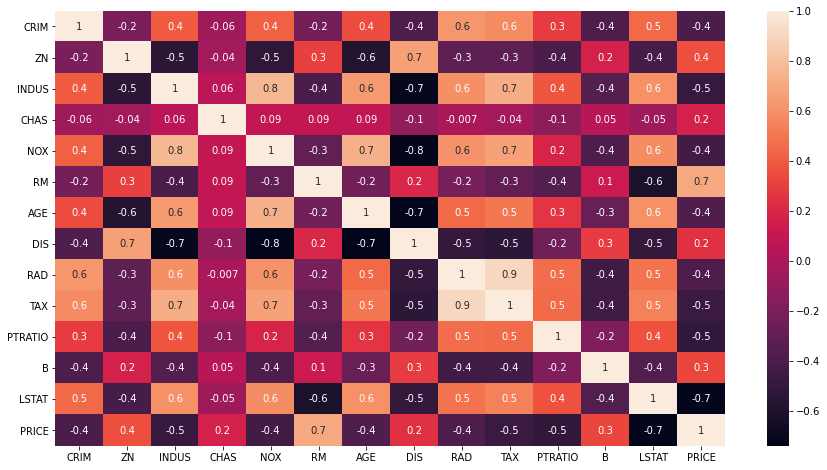

In [141]:
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(),annot=True,robust=True,fmt='.1g',)

<AxesSubplot:>

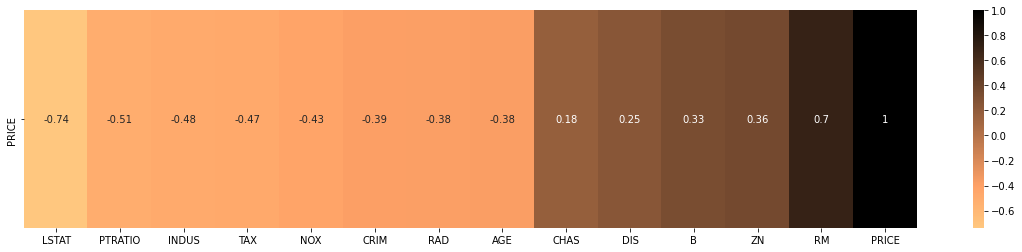

In [142]:
plt.figure(figsize=(20,4))
sns.heatmap(df1.corr().tail(1).sort_values("PRICE",axis=1),annot=True,cmap='copper_r')

# No multicolinearity 

In [147]:
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(df1.to_numpy(),i) for i in range(df1.shape[1])]


<AxesSubplot:>

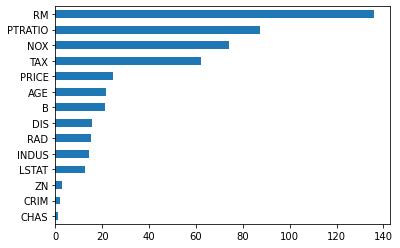

In [151]:
vif = pd.Series(vif,index=df1.columns)
vif.sort_values().plot(kind='barh')

In [40]:
x=df1.drop('PRICE',axis=1)
vif_list=[]
for i in range(x.shape[1]):
    vif=variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
vif_list
d_frame =pd.DataFrame(vif_list,x.columns)

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
List=[]
x=df1.drop('PRICE',axis=1)
for i in range(x.shape[1]):
    vif= variance_inflation_factor(x.to_numpy(),i)
    List.append(vif)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i i range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    List.append(vif)

In [ ]:
it measure the amount of mulicoliniary between iindepend 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif  = [variance_inflation_factor(x.to_numpy(),i) for i in range(shape[1])
s=pd.Series(vif,index=x>columns)
s.sort_values().plot(kind='barh')

<AxesSubplot:>

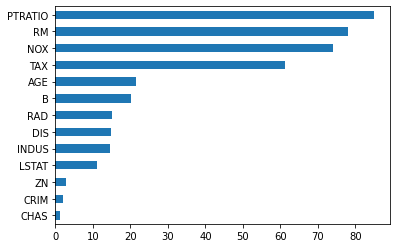

In [80]:
s=pd.Series(List,index=x.columns)
s.sort_values().plot(kind='barh')

<AxesSubplot:>

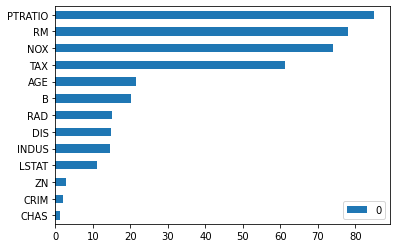

In [74]:
d_frame.sort_values(by=0).plot(kind='barh')

## Train model

In [152]:
x=df1.drop("PRICE",axis=1)
y=df1['PRICE']
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [153]:
from sklearn.preprocessing import LabelEncoder

# Linear Regression

In [154]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

# Training Data Evalution 


In [155]:
# Training Data Evalution 
y_pred_train = lr_model.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
print(mse)
mae =mean_absolute_error(y_train,y_pred_train)
print(mae)
r2 = r2_score(y_train,y_pred_train)
print(r2)

r2_adj = 1-(((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1)) # number of predictor p i.e feature
print(r2_adj)

21.641412753226312
3.314771626783229
0.7508856358979673
0.7425818237612329


In [156]:
# testing Data Evalution 
y_pred_test = lr_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred_test)
print(mse)
mae =mean_absolute_error(y_test,y_pred_test)
print(mae)
r2 = r2_score(y_test,y_pred_test)
print(r2)

r2_adj = 1-(((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)) # number of predictor p i.e feature
print(r2_adj)

24.29111947497344
3.1890919658878345
0.6687594935356331
0.6198262368988516


# Ridge

In [157]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=45)

In [158]:
model =LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [160]:
y_pred = model.predict(x_train)
mean_absolute_error(y_train,y_pred)

3.1219754307850685

In [163]:
ls =Ridge(alpha=1.0)
ls.fit(x_train,y_train)
y_pred = ls.predict(x_train)
mean_absolute_error(y_train,y_pred)

3.1242861677171856

# Hyperparameter tunning

In [169]:
para = {'alpha':np.arange(0.01,1,0.01)}
model = Lasso()
rndm =RandomizedSearchCV(model,para,cv=5)
rndm.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])})

In [170]:
rndm.best_estimator_

Lasso(alpha=0.06999999999999999)

In [171]:
model =Lasso(alpha=0.06999999999999999)
model.fit(x_train,y_train)

Lasso(alpha=0.06999999999999999)

In [172]:
y_pred = model.predict(x_train)
mean_absolute_error(y_train,y_pred)

3.1911438667634995

In [33]:
obj_ridge =Ridge(alpha=1.0)
obj_ridge.fit(x_train,y_train)

Ridge()

In [34]:
# Training Data Evalution 
y_pred_train = obj_ridge.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
print(mse)
mae =mean_absolute_error(y_train,y_pred_train)
print(mae)
r2 = r2_score(y_train,y_pred_train)
print(r2)

r2_adj = 1-(((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1)) # number of predictor p i.e feature
print(r2_adj)

21.82411829157586
3.300306788685069
0.7487825119234439
0.7404085956542255


In [35]:
# testing Data Evalution 
y_pred_test = obj_ridge.predict(x_test)
mse=mean_squared_error(y_test,y_pred_test)
print(mse)
mae =mean_absolute_error(y_test,y_pred_test)
print(mae)
r2 = r2_score(y_test,y_pred_test)
print(r2)

r2_adj = 1-(((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)) # number of predictor p i.e feature
print(r2_adj)

24.477191227708655
3.132947427805535
0.6662221670168522
0.6169140780534326


# Lasso

In [36]:
obj_lasso = Lasso(alpha=1.0)
obj_lasso.fit(x_train,y_train)

Lasso()

In [37]:
# Training Data Evalution 
y_pred_train = obj_lasso.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
print(mse)
mae =mean_absolute_error(y_train,y_pred_train)
print(mae)
r2 = r2_score(y_train,y_pred_train)
print(r2)

r2_adj = 1-(((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1)) # number of predictor p i.e feature
print(r2_adj)

26.416866673122932
3.650189747402182
0.6959153721670908
0.6857792179059938


In [38]:
# testing Data Evalution 
y_pred_test = obj_lasso.predict(x_test)
mse=mean_squared_error(y_test,y_pred_test)
print(mse)
mae =mean_absolute_error(y_test,y_pred_test)
print(mae)
r2 = r2_score(y_test,y_pred_test)
print(r2)

r2_adj = 1-(((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)) # number of predictor p i.e feature
print(r2_adj)

24.409489761299707
3.253539767368162
0.6671453631686304
0.6179736554549053


# Hyper Parameter Tuning

In [39]:
1. GridSearchCv
2. RandomizedSearchCv
# alpha = 0.01 to infi

SyntaxError: invalid syntax (<ipython-input-39-19c69d22a352>, line 1)

### 1. GridSearchCv with lasso

In [ ]:
obj = lass()
para ={'alpha':np.arange(0.01,3,0.01)}


In [173]:
obj_l =Lasso()
grid_para ={"alpha":np.arange(0.01,3,0.01)}
GSCV_l= GridSearchCV(obj_l,grid_para,cv=5)
GSCV_l.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [43]:
GSCV_l.best_estimator_
# using above best_estimator value we can pass as alpha =?
obj_lasso = Lasso(alpha=0.01)
obj_lasso.fit(x_train,y_train)

Lasso(alpha=0.01)

In [44]:
# Training Data Evalution 
y_pred_train = obj_lasso.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
print(mse)
mae =mean_absolute_error(y_train,y_pred_train)
print(mae)
r2 = r2_score(y_train,y_pred_train)
print(r2)

r2_adj = 1-(((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1)) # number of predictor p i.e feature
print(r2_adj)

21.678189501611698
3.2986349701174174
0.7504622986421128
0.7421443752635166


In [45]:
# testing Data Evalution 
y_pred_test = obj_lasso.predict(x_test)
mse=mean_squared_error(y_test,y_pred_test)
print(mse)
mae =mean_absolute_error(y_test,y_pred_test)
print(mae)
r2 = r2_score(y_test,y_pred_test)
print(r2)

r2_adj = 1-(((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1)) # number of predictor p i.e feature
print(r2_adj)

24.3033356028906
3.16045241486968
0.6685929109949444
0.619635045573743


### 1. GridSearchCv with Ridge

In [49]:
obj_R  = Ridge()
GSCV_Para ={'alpha':np.arange(0.01,3,0.01)} 
GSCV_R =GridSearchCV(obj_R,GSCV_Para)
GSCV_R.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [51]:
GSCV_R.best_estimator_

Ridge(alpha=0.01)

In [52]:
obje_ridge =Ridge(alpha=0.01)
obje_ridge.fit(x_train,y_train)

Ridge(alpha=0.01)

In [53]:
y_pred_train = obje_ridge.predict(x_train)
MSE =mean_squared_error(y_train,y_pred_train)
print(MSE)
MAE =mean_absolute_error(y_train,y_pred_train)
print(MAE)
r2 =r2_score(y_train,y_pred_train)
print(r2)               

21.641470874961215
3.3140694182534953
0.7508849668585106


In [54]:
y_pred_test = obje_ridge.predict(x_test)
MSE =mean_squared_error(y_test,y_pred_test)
print(MSE)
MAE =mean_absolute_error(y_test,y_pred_test)
print(MAE)
r2 =r2_score(y_test,y_pred_test)
print(r2)

24.291746282968216
3.1879971495785275
0.6687509462063155


# 2.RandomizedSearchCv

# 2.1 Lasso

In [63]:
estimator1 =Lasso()
para ={'alpha':np.arange(0.01,3,0.01)}
obj_random =RandomizedSearchCV(estimator1,para,cv=5)
obj_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99]

In [64]:
obj_random.best_estimator_

Lasso(alpha=0.11)

In [65]:
obj_lasso =Lasso(alpha=0.11)
obj_lasso.fit(x_train,y_train)

Lasso(alpha=0.11)

In [66]:
y_pred_train = obj_lasso.predict(x_train)
MSE =mean_squared_error(y_train,y_pred_train)
print(MSE)
MAE =mean_absolute_error(y_train,y_pred_train)
print(MAE)
r2 =r2_score(y_train,y_pred_train)
print(r2)

22.778302861276256
3.348068936172986
0.7377988906124253


In [67]:
y_pred_test = obj_lasso.predict(x_test)
MSE =mean_squared_error(y_test,y_pred_test)
print(MSE)
MAE =mean_absolute_error(y_test,y_pred_test)
print(MAE)
r2 =r2_score(y_test,y_pred_test)
print(r2)

25.153275754355512
3.146747615117105
0.6570028891136681


# 2.2 Ridge

In [68]:
estimator =Ridge()
para ={'alpha':np.arange(0.01,3,0.01)}
randommm = RandomizedSearchCV(estimator,para,cv=5)
randommm.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99]

In [74]:
randommm.best_estimator_
obje_ridge = Ridge(alpha=0.4)
obje_ridge.fit(x_train,y_train)

Ridge(alpha=0.4)

In [75]:
y_pred_train = obje_ridge.predict(x_train)
MSE =mean_squared_error(y_train,y_pred_train)
print(MSE)
MAE =mean_absolute_error(y_train,y_pred_train)
print(MAE)
r2 =r2_score(y_train,y_pred_train)
print(r2)

21.695672179640432
3.2997356186284503
0.7502610554853193


In [76]:
y_pred_train = obje_ridge.predict(x_train)
MSE =mean_squared_error(y_train,y_pred_train)
print(MSE)
MAE =mean_absolute_error(y_train,y_pred_train)
print(MAE)
r2 =r2_score(y_train,y_pred_train)
print(r2)

21.695672179640432
3.2997356186284503
0.7502610554853193
